# Linear Regression

Perform linear regression using real world dataset

**Lecture section: TC1L**

**Tutorial section: TT2L**

| | Student ID     | Student Name                        
|--:|:-------------|:------------------------------------
| 1 | 1211101888   | SHAHNAZ BINTI HUSAIN SUKRI          
| 2 | 1221303909   | MUHAMMAD UKASYAH BIN MD YUSOF           

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reads the cleaned dataset
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Remove unrelated columns
df = df.drop(columns=['Serial No.'], axis=1)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
target = 'Chance of Admit '

X = df[features]
y = df[target]

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

#Observing prediction value against real value
some_data = X_test[:5]    # take first 5 entries from X_test
predicted_value = reg.predict(some_data)
print(predicted_value)

actual_value = y_test.iloc[:5].values     # take first 5 entries from y_test, which are the true values
print(actual_value)

[0.72298322 0.69528358 0.78934352 0.78213989 0.85310709]
[0.67 0.64 0.8  0.81 0.86]


In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer

#Evaluate the model
#MAE = the average of the absolute differences between the predicted and actual values.
#MSE = measures the average squared difference between actual and predicted values
#r2 = indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.04328575086815425
Mean Squared Error (MSE): 0.0041837570264952354
R-squared (R2): 0.8163951846360172


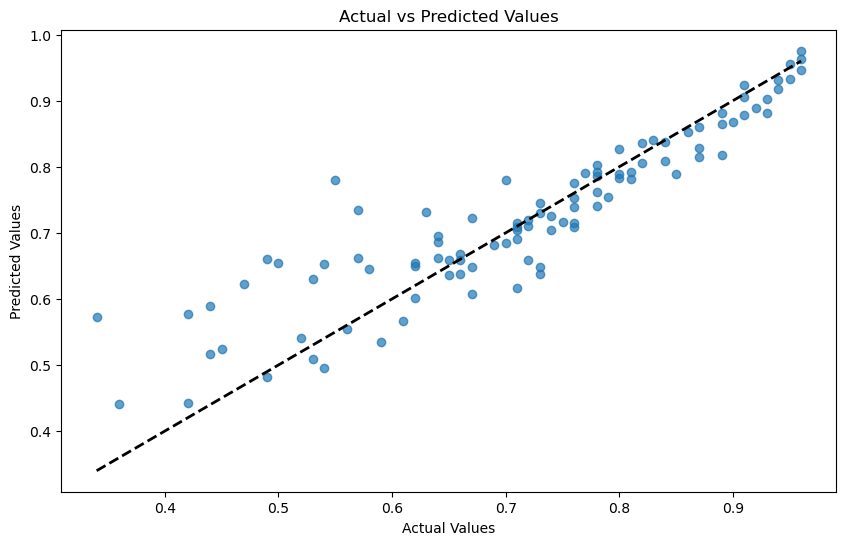

Cross Validition R2: 0.7375641057750304
[0.06944095 0.04425817 0.04078066]
Cross Validation MAE: 0.051493257583730266
                   Coefficient
CGPA                  0.067903
LOR                   0.018706
TOEFL Score           0.017300
GRE Score             0.016284
Research              0.014224
University Rating     0.009020
SOP                  -0.002590


In [9]:
#Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

#Perform cross-validation
regmodel = LinearRegression()
cv_results = cross_validate(regmodel, X, y, cv=3, return_train_score=False)
cv_r2 = cv_results['test_score'].mean() # R square
print(f'Cross Validition R2: {cv_r2}')

mae_scorer = make_scorer(mean_absolute_error)
cv_results = cross_validate(regmodel, X, y, cv=3, scoring=mae_scorer, return_train_score=False)
print(cv_results['test_score'])
cv_mae = cv_results['test_score'].mean()
print(f'Cross Validation MAE: {cv_mae}')

#Coefficients analysis
coefficients = pd.DataFrame(reg.coef_, features, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

### Analysis

- MAE: The model's predictions are off by approximately 0.0433 units. This indicates that the model is making relatively small errors when predicting the target variable. 
- R2: The value is close to 1, being the model has a relatively good fit
- Predicted Value: Observing predicted value against actual values, we see that the predicted value is reasonably close to the actual values
- Graph: The points are closely aligned around the dashed line, indicating that the model's predictions are fairly accurate.

- Coefficients
    - Higher CGPA, LOR (letter of recomendation), TOEFL score, GRE score, having reasearch experience and University rating are associated with higher chance of admissions

In [10]:
# Future predictions
future_data = pd.DataFrame({
    'GRE Score': [320, 315],
    'TOEFL Score': [110, 105],
    'University Rating': [4, 2],
    'SOP': [4.0, 3.5],
    'LOR ': [4.0, 4.5],
    'CGPA': [9.0, 7.5],
    'Research': [1, 0]
})

# Standardize the future data
future_data_scaled = scaler.transform(future_data)

# Make predictions on future data
future_predictions = reg.predict(future_data_scaled)

# Display future predictions
print(f"Future Predictions: {future_predictions}")

Future Predictions: [0.81459768 0.58954238]


### References

**Dataset Source:** [Graduate Admissions](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)